# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*

- *What kind of rewards is the driving agent receiving?*
    
- *How does the light changing color affect the rewards?* 


**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- *Does the Smartcab move at all during the simulation?*

    * Running the agent.py code, the smartcab seems to be in idle at all times. The reason for this is because in the cell above, the cab never seems to move. It is idle when the light is green, and it also stays in position when the light is red.


- *What kind of rewards is the driving agent receiving?*

    * Although there only seems to be two different rewards while running the default code, being idle at a green and red light. There should probably also be three other rewards such as mistakenly moving forward if the light is red, not reaching the destination, and reaching the destination.
    
    
- *How does the light changing color affect the rewards?* 

    * The agent receives negative rewards for staying idle at a green light. The idle is receiving a positive reward for staying idle at a red light. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

* Three flags that can be set are whether or not we want the agent to learn, the learning rate, and the epsilon value.
    * We can set the 'learning' variable to either true or false. In reinforcement learning we use something called transitions. The transition is abbreviated as <state (s), action (a), reward (r), state' (s')>. In the Q learning equation, we return a value of arriving in some state 's', the value reward is the reward of that state 'r', then we leave that state through some action 'a'. When we land  in a new state "s'", we will calculate whichever action has the highest Q value from there. So when we set the 'learning' variable to true, we will be able to update the Q value to see whichever action has the highest value. If we have the 'learning' variable to false, then we the Q value will not be able to be updated and won't be able to understand what the optimal policy is after taking a particular action.
    * We can set the alpha, aka the learning rate of the Q learning equation. A learning rate of one for example, would mean that when we see a trasition, we update the Q values of state and action. We move it alpha the way to "r + (gamma)max(a')Q(s',a')". We will take 100% of the new Q value to update the Q-learning equation.
    * Epsilon is the random exploration factor. For example, even if the agent has explored many actions from within a state, and knows which is the best action to take. Sometimes the agent will randomly choose a random action even though it may not be the correct one. This is why there should be some decay factor to the learning rate, to make sure that as time goes by and the agent has learned the most optimal actions, to not randomly explore as much since it already knows the best action to take.


* In the 'environment.py' file, the 'act()' function under the Environment class seems to be the function which performs a particular action.


* In the 'simulator.py' Python file, the 'render_text()' function will display the various actions and rewards received for taking either a wrong or correct action, depending on the state that the agent is currently in. This function will just display it in the console, but not be shown in the GUI. The 'render()' function will have the various colors and actual GUI when displaying the simulation for the actions that the agent will be taking.
 
 
* In the 'planner.py' file, the 'next_waypoint()' function considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


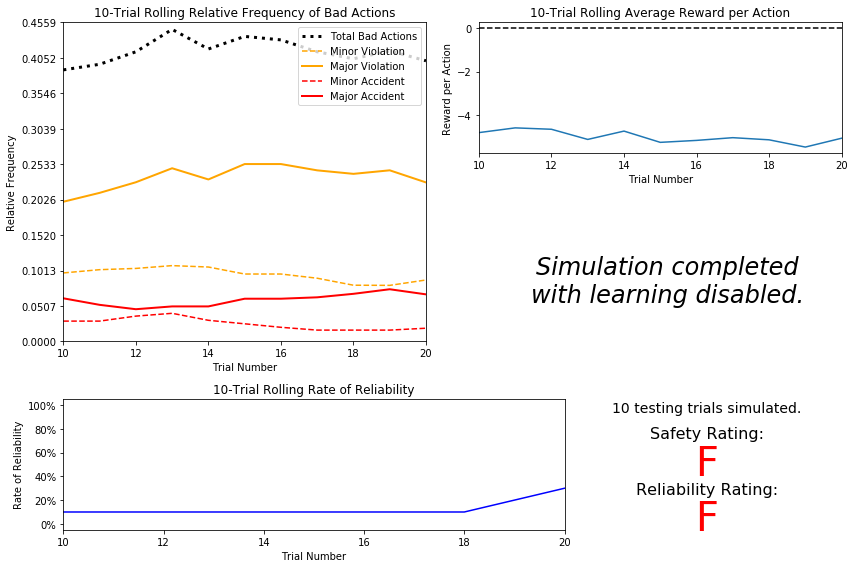

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

* Based upon the "Total Bad Actions" line, it appears that around 43% of the time, the agent is making a bad action. Many of these bad decisions cause accidents, for example there seems to be one. It appears that 8% of the time, an accident occurs. Or we can say that if a bad action occurs, there is an 18.6% chance that an accident occurs (8/43 = .186).


* The rate of reliability makes sense because the rate is hovering around 10% which is fairly low. When we look at the number of actions that we can take, we see that the probability is very low that the agent performs that correction action given a certain state.


* The agent receives either a positive or a negative reward for the action it performed. It will be a positive reward if the correct action is taken or possibly if it is a very minor violation. The negative reward is rewarded when the agent performs and violation. Due to the agent randomly picking an action it makes sense that the average reward per action is around -5. This suggests that the agent was penalized heavily because there are many reward values that are more negative than -5.


* When the number of trials increase, the outcome of the results seem to be hovering around the same spot. The results seem to be consistent across the board when comparing the outcomes of each trial. The theme is the same for each trial, that many violations occured and the agent has an average negative reward.


* This smartcab, in its current state, is very dangerous for its passengers. This is due to the fact that there is a high probability of a violation to occur. Also, even though a low probability, to have an accident around 8% of the time that you are driving is very dangerous when compared to the real world.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

* For the **Safety** variable I would assume that 'light' is very important to determining the safety because depending on the state of light should be the action that the agent should take. Light is highly correlated to safety because if the agent learns the rule of the lights, to stop on a red light, then the agent should avoid all accidents. The other features, 'left', 'right', and 'oncoming' are also important because it determines if other vehicles are present, so these features are useful to avoid traffic as well.


* For the **Efficiency** variable I would assume would that 'waypoint' is an important feature. Waypoint is important because it determines the direction of the agent. 


* 'Deadline' does not seem that important for either safety or efficiency. If in fact we use deadline, then perhaps it will sacrifice safety to get to the destination faster. In terms of efficiency, deadline should hopefully not affect it too much because when the agent has learned from its various actions, it should automatically strive to perform the best action depending on which state is in.


* **Required Change**
    * Deadline will also make implementation inefficient as adding this variable will drastically increase the dimension of the state space. Also, due to the agent wanting to meet the deadline, the agent may may illegal moves to get to the destinations. This sacrifices both safety and efficiency.



### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

* The size of the state space will be (3)(2)(4)(4)(4) = 384. The reason for this is shown below. We get the total number of states for each feature. Then we multiply them together to get the total number of combinations of states. I believe that 384 different states may be hard to find an optimal policy given the constraint that there is a deadline. However, I do believe that using all of these features will result in finding the best policy so I will go ahead and keep these number of features.


    * Waypoint has three different state spaces - 'Forward', 'Left', 'Right'
    * Light has two different state spaces - 'Green', 'Red'
    * Oncoming has four different state spaces - 'Forward', 'Left', 'Right', None
    * Left has four different state spaces - 'Forward', 'Left', 'Right', None
    * Right has four different state spaces - 'Forward', 'Left', 'Right', 
    
    

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

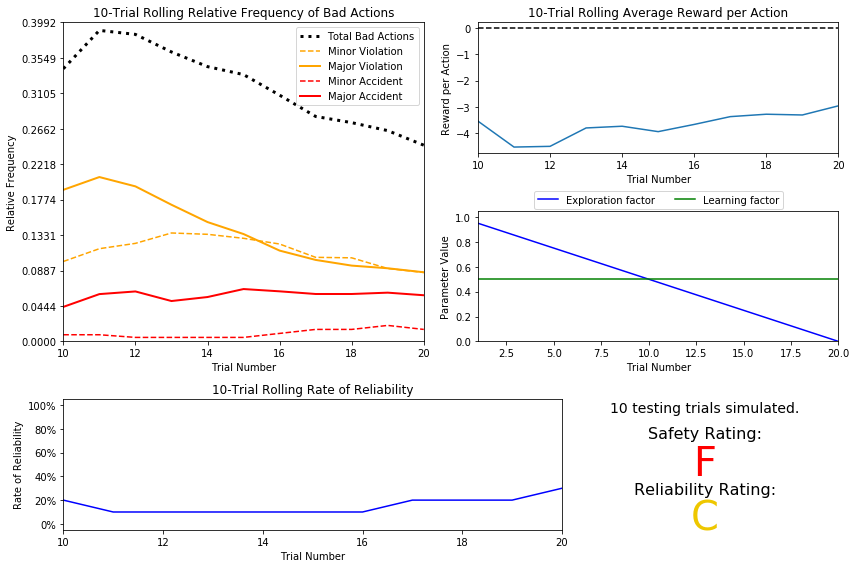

In [36]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

* The Q-Learning agent seems to have similar results to the random basic driving agent all the way up to trial 12. The Q-Learning agent seems to make a lot of mistakes early on, just as the basic agent, but due to learning the best action to take at each state, the Q-Learning agent performs much better than the basic driving agent. Actually, it appears that the Q-learning agent does poorer at first, as we see that in the earlier trials, the rate of reliability is lower at a staggering 0%, as well as the 10-trial average reward per action is at a -6, compared to the basic which seems to be hovering around -5.

* There were 20 training trials and 10 test trials. I confirmed this when looking at the output CSV file for this updated Q-learning agent. Given the epsilon-tolerance, the amount of trials makes sense as at trial number 20, the agent's epsilon value is at zero.


* Looking at the epsilon decay in the graph above, the decay rate seems to be accurately implemented. If we calculate the slope of the line, the decay rate is at a -.05 (0.5 - 0.0 / 10 - 20 = -.05). This just means that as the number of trials progress and the agent learns the best policy, then the probability that the agent will perform a random exploaration action will decrease.


* As the number of trials increased we can see that the number of bad actions decreased by a a lot. 
    * The average number of trials decreased from 48% at trial 12 to 22% at trial 20.
    * The average reward also increased from a -7 at trial 12 to -3.7 at trial 20.
    
    
* The safety rating appears to be the same, 'F' rating. The reliability rating greatly improved from the intitial driving agent to the Q-learning agent as the grade increased from an 'F' to a 'B'.


* **Required changes** - Fixed the code based on reviewers comments, reran the program, and updated the answers to these questions below.

* The Q-Learning agent seems to have similar results to the random basic driving agent all the way up to trial 27. The Q-Learning agent seems to make a lot of mistakes early on, just as the basic agent, but due to learning the best action to take at each state, the Q-Learning agent performs much better than the basic driving agent. On the last trial, trial 39, the Q-learning agent is able to make less mistakes than the basic agent. The total bad actions percentage, at the last trial, for the Q-learning agent is at 20% compared to the basic agetn at around 40%.

* There were 39 training trials and only 15 test trials. I confirmed this when looking at the output CSV file for this updated Q-learning agent. Given the epsilon-tolerance, the amount of trials makes sense as at trial number 39, the agent's epsilon value is at zero.


* Looking at the epsilon decay in the graph above, the decay rate seems to be accurately implemented. If we calculate the slope of the line, the decay rate is at a -.05 (0.5 - 0.0 / 10 - 20 = -.05). This just means that as the number of trials progress and the agent learns the best policy, then the probability that the agent will perform a random exploaration action will decrease.


* As the number of trials increased we can see that the number of bad actions decreased by a a lot. 
    * The average number of bad actions per trial decreased from 45% at trial 25 to 20% at trial 39.
    * The average reward also increased from a -5.5 at trial 25 to -2 at trial 39.
    
    
* The safety rating appears to be the same, 'F' rating. The reliability rating greatly improved from the intitial driving agent to the Q-learning agent as the grade increased from an 'F' to a 'C'.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

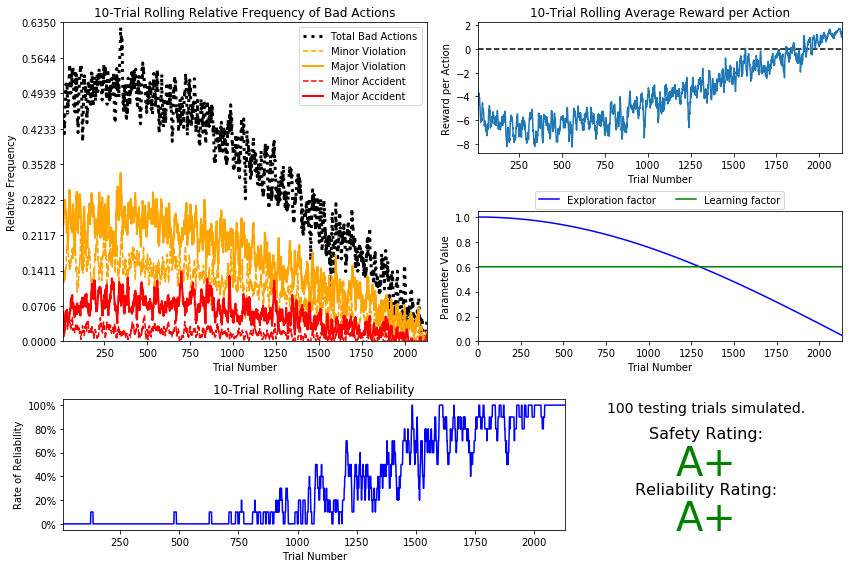

In [29]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- *What decaying function was used for epsilon (the exploration factor)?*

    * For epsilon, the decay function that was used was the exponential of the negative alpha multiplied by the number of trials. The exact formula was epsilon = 1/self.trial**2.
    
    
- *Approximately how many training trials were needed for your agent before begining testing?*

    * There were many training trials for the epsilon value to reach zero. There were close to 2000 training trials. This is because the epsilon decay rate formula that was used was very slow.

- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

    * The epsilon tolerance that was used was 0.01. The learning rate that was used was 0.02 because we wanted to explore all of the possible combinations of actions and the rewards. The low alpha made it so that there was a high amount of trials to that the agent could successully test each action on the various states and learn from all the many trials. With a low alpha value, generally it is also recommended to have a low epsilon tolerance.

- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*

    * In regards to safety, the grade increased from an F to an A+
    * In regards to reliability, the grade increased from a B to an A

- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

    * I believe that this optimized Q-learner has successfully learned an appropriate policy. The reason for this is because during testing, we can see that the agent reliably knows how to abide to the street rules and avoid accidents at a high rate. 

- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

    * I am satisfied because safety is the number one concernI believe when it comes to driving. The optimized agent now seems to avoid crashes, and on top of that it can get to its destination reliably.
    
    
* **Required Changes** - Re-edited the code based on feedback and reran the program. Below are the answers to the questions using the data from the revised code.

- *What decaying function was used for epsilon (the exploration factor)?*

    * For epsilon, the decay function that was used was cosine of pi/2 multiplied by the trial number/total number of trials.. The exact formula was epsilon = cos(3.14/2 * (trial_number / number_trials)). This formula was useful because in the initial trials, random exploration was at values very close to one. This made it so that the agent can acknowledge various rewards based on taking random actions. The epsilon decay rate using this formula resembled logarithmic decay.
    
    
- *Approximately how many training trials were needed for your agent before begining testing?*

    * There were many training trials for the epsilon value to reach zero. There were exactly 2200 training trials. This is because the epsilon decay rate formula that was used was very slow to decay initially. Which is a good thing because it made it so that the agent can test out various random actions early on.

- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

    * The epsilon tolerance that was used was 0.01. The learning rate that was used was 0.6 because we wanted to explore all of the possible combinations of actions and the rewards. The alpha made it so that there was  the agent could successully test each action on the various states and learn from all the many trials. The low epsilon tolerance was useful because it helped determine the number of training trials.
    

- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*

    * In regards to safety, the grade increased from an F to an A+
    * In regards to reliability, the grade increased from a C to an A+

- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

    * I believe that this optimized Q-learner has successfully learned an appropriate policy. The reason for this is because during testing, we can see that the agent reliably knows how to abide to the street rules and avoid accidents at a high rate. The agent also reliably gets to its destination. I would hope that with the high number of trials, and the high epsilon for the majority of those trials, that the agent determined which action yields the highest reward.

- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

    * I am satisfied because safety is the number one concern I believe when it comes to driving and it received an A+. The optimized agent now seems to avoid crashes, and on top of that it can get to its destination reliably.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._


2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

* **Required Changes** I have just re-updated the previous answers with the new answers, after running the new code.

* A policy is, 'given a state, what is the next best action that I can take?'. In the smartcab environment, the best set of instructions would be as follows:
    * When the light is green you should move forward, left, or right depending on the waypoint. **Required Change submission 3- However, if the agent wants to turn left, the agent needs to make sure that there is no oncoming traffic that is moving forward or turning right. In US traffic laws, at an intersection with a green light, the incoming car has the right of way to go straight or turn right.**
    * When the light is red you should stop completely, or move right depending on the waypoint. But, only go right on red if there are no incoming cars
    
    
* Using these two examples below from the 'sim_improved-learning.txt file it appears that the correct policy has been implemented. For the first example, it was a red light, so it had the highest reward for turning right due to the waypoint being right; although it was a red light, in the US you can turn right during a red light. In the second example, the waypoint was forward and the light was green, which makes perfect sense as to why the best policy would be to go forward and receive a reward for it.
    * ('right', 'red', None, 'left', None)
 -- forward : -6.27
 -- right : 0.49
 -- None : 0.00
 -- left : 0.00

    * ('forward', 'green', None, 'left', 'left')
 -- forward : 1.24
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 
* In the following example, the waypoint is left and the light is green. However, it seems like the highest value is forward. There is even no negative reward for stopping on a green light. I do not believe that this is the optimal policy because the highest value should be left for this given state. The agent may not have learned the desired policy for the given state because there may not have been enough trials for the agent to finalize its correct learning. Or possibly, in this state there could have been traffic preventing the car from turning left, which may explain why the best reward was just to go straight.
    * ('left', 'green', None, None, 'left')
 -- forward : 0.51
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00






    

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.